<h1 align=center > Loan Eligibility Analysing and Predicting </h1>

In [60]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [61]:
df = pd.read_csv('data/loan_data_set.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
536,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
309,LP001998,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,Y
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
212,LP001713,Male,Yes,1,Graduate,Yes,7787,0.0,240.0,360.0,1.0,Urban,Y


### Dimension of data

In [62]:
df.shape

(614, 13)

### How Many Null Values?

In [63]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### What type of data is?

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Cleaning

In [65]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [66]:
sns.set_context('paper', font_scale = 2)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Separate out Categorical and Numerical Features

In [67]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [68]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [69]:
num_df = df[num_cols]
num_df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
179,2333,1451.0,102.0,480.0,0.0
515,3466,3428.0,150.0,360.0,1.0
365,6216,0.0,133.0,360.0,1.0
117,2214,1398.0,85.0,360.0,NaN
610,4106,0.0,40.0,180.0,1.0


In [70]:
cat_df = df[cat_cols]
cat_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
184,Female,Yes,0,Graduate,No,Semiurban,Y
588,NaN,No,0,Graduate,No,Semiurban,Y
18,Male,Yes,0,Not Graduate,No,Rural,N
221,Male,Yes,2,Graduate,No,Semiurban,Y
189,Male,Yes,0,Graduate,No,Rural,Y


<h1 align=center > Exploratory Data Analysis </h1>

In [71]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 'Yes' if x == 'Y' else 'No')

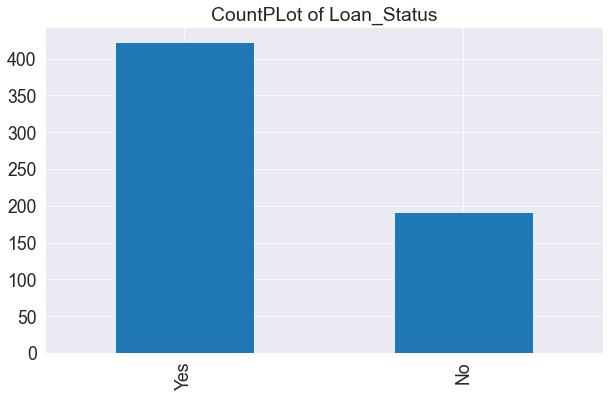

In [72]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('CountPLot of Loan_Status');

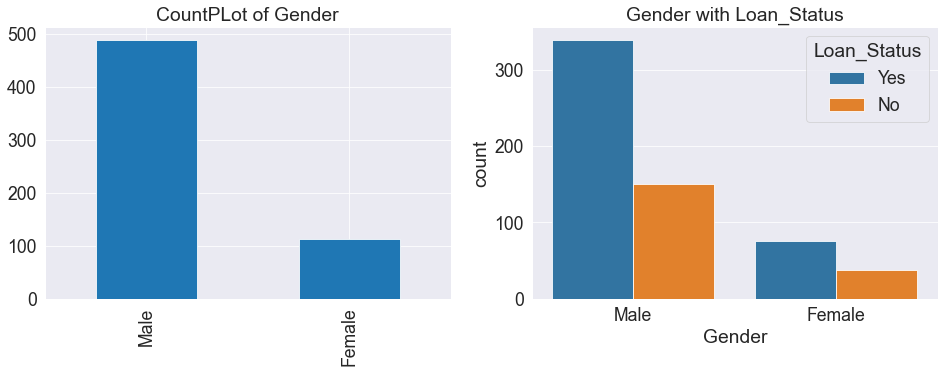

In [73]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Gender'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPLot of Gender')
sns.countplot(x = df['Gender'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Gender with Loan_Status');

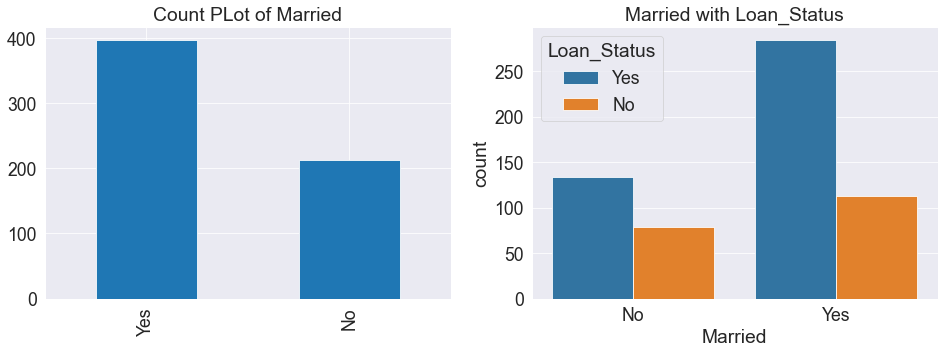

In [74]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Married'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Married')
sns.countplot(x = df['Married'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Married with Loan_Status');

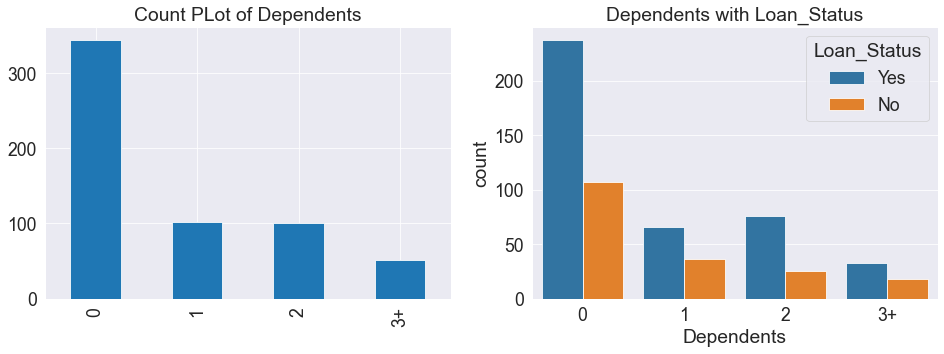

In [75]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Dependents'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Dependents')
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Dependents with Loan_Status');

In [76]:
df['Dependents'].fillna('0',inplace=True)
df['Dependents'].isnull().sum()

0

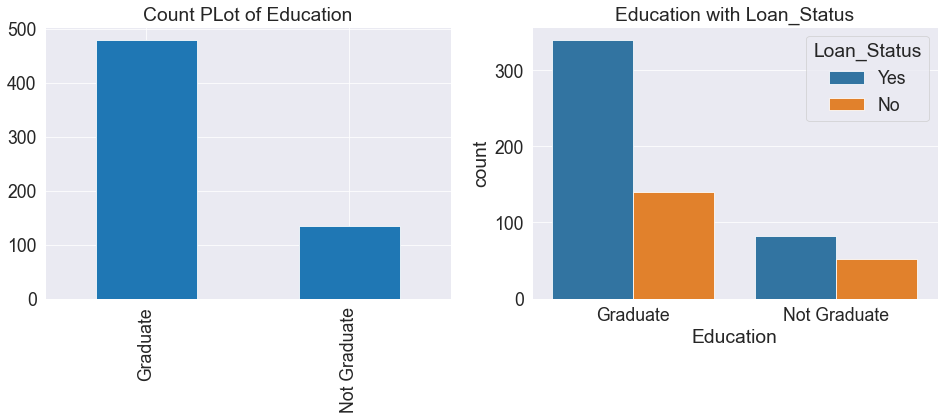

In [77]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Education'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Education')
sns.countplot(x = df['Education'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Education with Loan_Status');

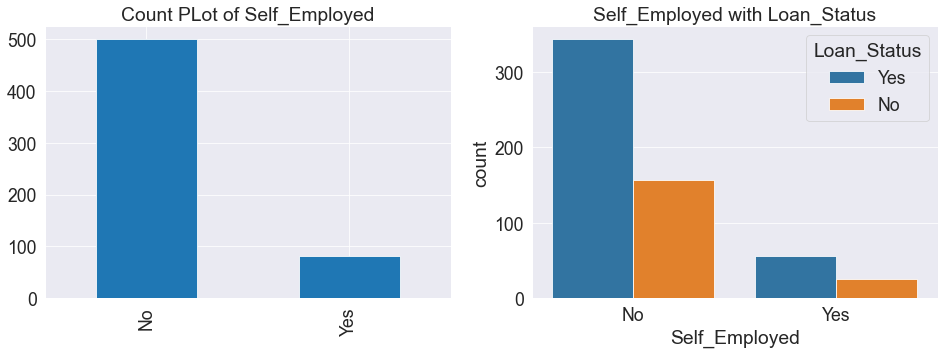

In [78]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Self_Employed'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Self_Employed')
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Self_Employed with Loan_Status');

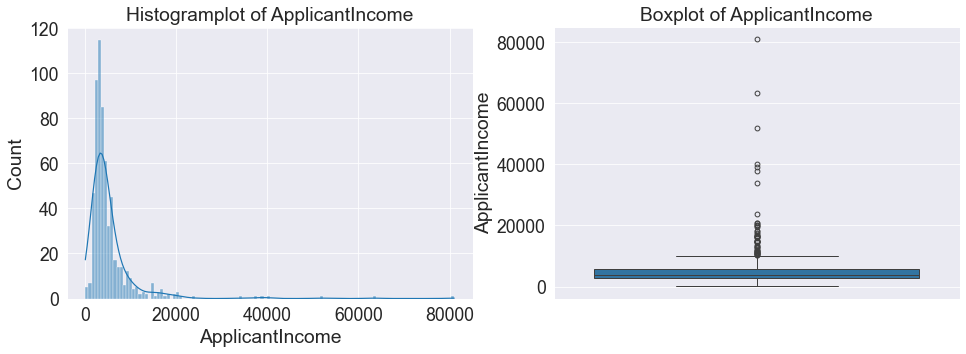

In [79]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['ApplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of ApplicantIncome')
sns.boxplot(df['ApplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of ApplicantIncome');

In [80]:
df['ApplicantIncome'].skew()

6.539513113994625

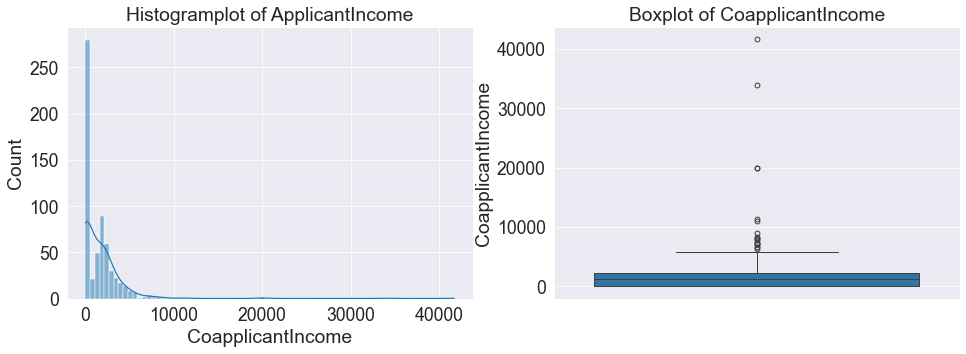

In [81]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['CoapplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of ApplicantIncome')
sns.boxplot(df['CoapplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of CoapplicantIncome');

In [82]:
df['CoapplicantIncome'].skew()

7.491531216657306

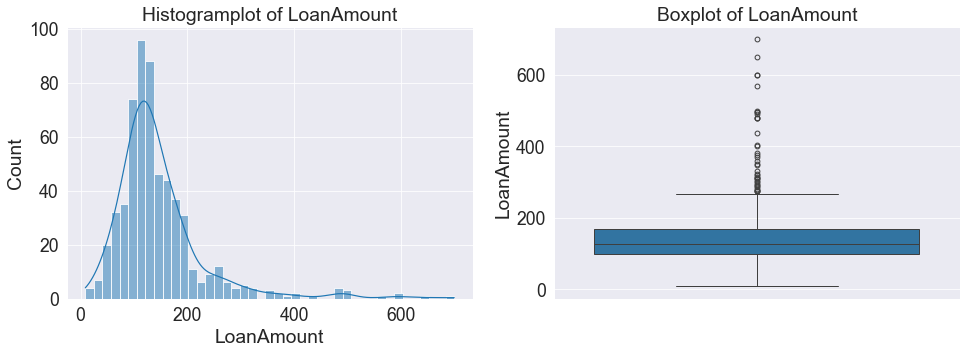

In [83]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['LoanAmount'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of LoanAmount')
sns.boxplot(df['LoanAmount'],ax=ax2)
ax2.set_title('Boxplot of LoanAmount');

In [84]:
df['LoanAmount'].skew()

2.677551679256059

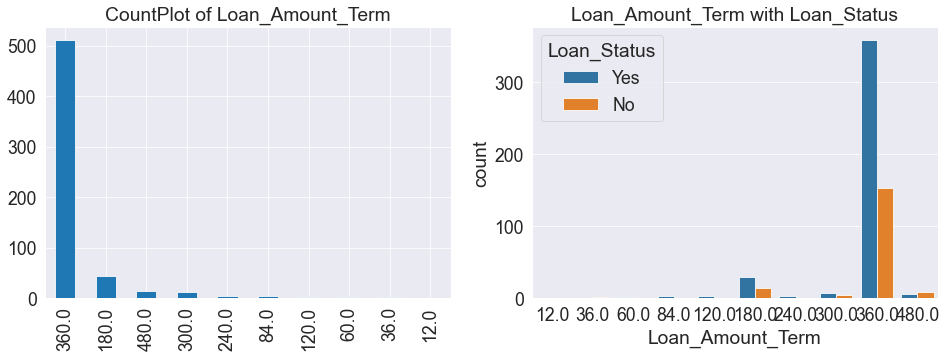

In [85]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Loan_Amount_Term'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPlot of Loan_Amount_Term')
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Loan_Amount_Term with Loan_Status');

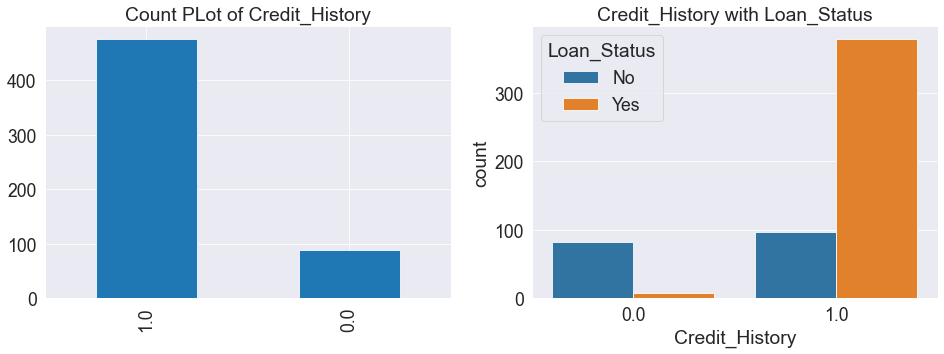

In [86]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Credit_History'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Credit_History')
sns.countplot(x = df['Credit_History'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Credit_History with Loan_Status');

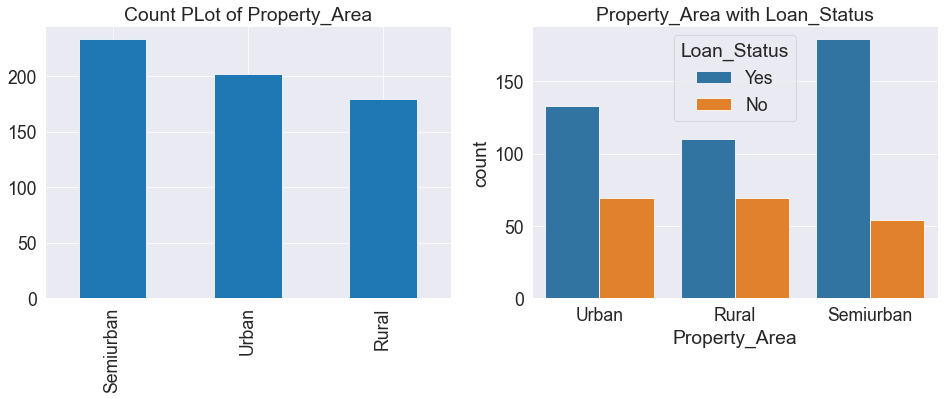

In [87]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Property_Area'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Property_Area')
sns.countplot(x = df['Property_Area'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Property_Area with Loan_Status');

In [88]:
X = df.drop(columns=['Loan_Status'])
y = df[['Loan_Status']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
df.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
cat_column = [0,1,4,8,9]
num_col = [7]

In [90]:
impute = ColumnTransformer(
    transformers=[
        ('cat', SimpleImputer(strategy='most_frequent'), cat_column),
        ('num', SimpleImputer(strategy='mean'), num_col)
    ],remainder='passthrough')


In [91]:
ohe_cols = [0,1,2,4,8,9,10]
ord_cols = [3]
num_cols = [5,6,7]
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Yes


In [92]:
encoding = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False,drop='first'), ohe_cols),
        ('ord', OrdinalEncoder(), ord_cols),
        ('standardization', StandardScaler(), num_cols)
        
    ],remainder='passthrough')


In [98]:
from sklearn.pipeline import Pipeline

cat_column = [0,1,4,8,9]
num_col = [7]
ohe_cols = [0,1,2,4,8,9,10]
ord_cols = [3]
num_cols = [5,6,7]
impute = ColumnTransformer(
    transformers=[
        ('cat', SimpleImputer(strategy='most_frequent'), cat_column),
        ('num', SimpleImputer(strategy='mean'), num_col)
    ],remainder='passthrough')

encoding = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False,drop='first'), ohe_cols),
        ('ord', OrdinalEncoder(), ord_cols),
        ('standardization', StandardScaler(), num_cols)
        
    ],remainder='passthrough')

pipeline = Pipeline(steps=[
    ('imputation', impute),
    ('Enco', encoding)
])


In [99]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: could not convert string to float: '3+'

In [ ]:
x_train

In [83]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13460\2264866656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


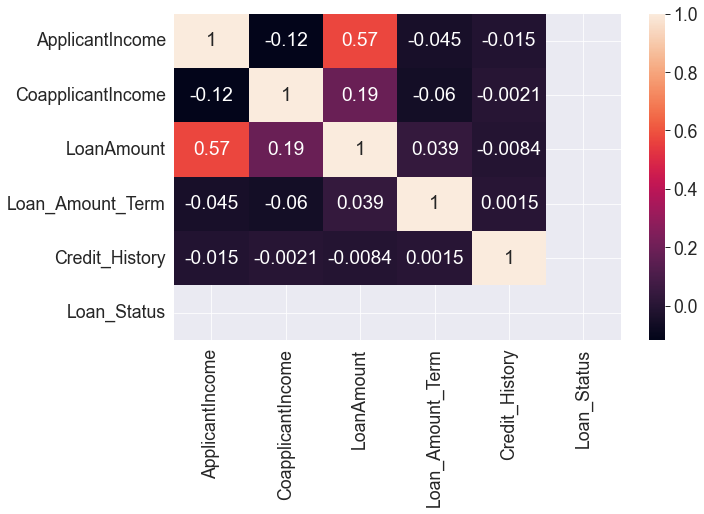

In [84]:
sns.heatmap(df.corr(),annot=True);